# 파이썬으로 배우는 통계학 (5장 정규선형모델)

## 5.1. 연속형 독립변수가 하나인 모델 (단순회귀)

### 분석 준비

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 선형모델을 추정하는 라이브러리 (경고가 나올 수 있음)
import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 3
%matplotlib inline

### 5.1.2. 데이터 읽기와 표시

In [2]:
beer = pd.read_csv("5-1-1-beer.csv")
print(beer.head())

   beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0
3  38.0         26.9
4  37.0         15.8


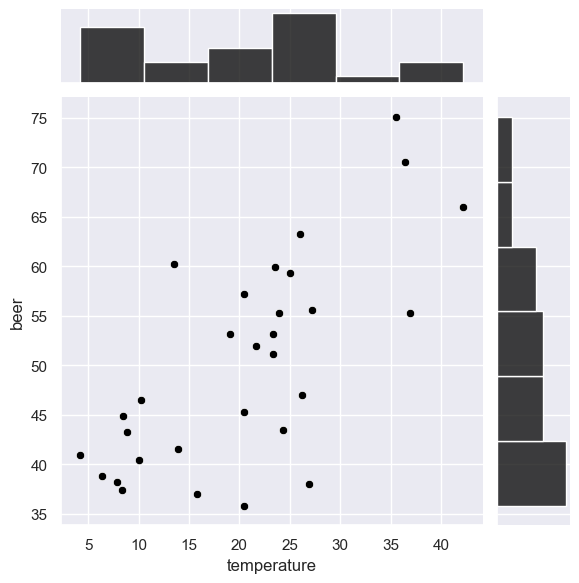

In [3]:
# 산포도 그래프
sns.jointplot(x = "temperature", y = "beer", 
              data = beer, color = 'black')
plt.show()

### 5.1.4 statsmodels을 이용한 모델링

맥주 판매량 ~ N(β0 + β1 * 기온, σ^2)

In [4]:
# 모델 구축
lm_model = smf.ols(formula = "beer ~ temperature", data = beer).fit()

# 종속변수(결과변수): beer
# 독립변수(입력변수): temperature

### 5.1.5 추정 결과 표시와 계수 검정

In [5]:
# 모델 추정 결과
lm_model.summary()

# Intercept: β0
# temperature: β1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Wed, 28 May 2025   Prob (F-statistic):           1.11e-05
Time:                        15:07:46   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Dep.Variable: 종속변수의 이름
* Model, Method: 모델 패러미터 추정방법 (최소제곱법, Ordinary Least Squares)
* Date, Time: 모델을 추정한 날짜, 시간
* No. Observations: 샘플사이즈
* Df Residuals: 샘플사이즈에서 추정한 패러미터를 뺀 것
* Df Model: 모델의 자유도(사용된 독립변수의 수)
* Covariance Type: 공분산 타입. 특별히 지정하지 않으면 nonrobust -> 넘어감
* R-squared, Adj.R-squared: 결정계수(R^2) 및 자유도 조정이 적용된 결정계수
* F-statistics, Prob (F-statistics): 분산분석 결과
* Log-Likelihood: 최대로그우도
* AIC: 아카이케 정보 기준 (Akaike's Information Criteria)
* BIC: 베이즈 정보 기준 (Bayes Information Criteria)

### 5.1.7. AIC를 이용한 모델 선택
- 독립변수가 1개만 있는 Null 모델 (기온과 맥주판매량이 무관함)
- 독립변수가 2개인 위의 모델

In [6]:
# NULL 모델
null_model = smf.ols("beer ~ 1", data = beer).fit()
null_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 28 May 2025   Prob (F-statistic):                nan
Time:                        15:11:42   Log-Likelihood:                -112.97
No. Observations:                  30   AIC:                             227.9
Df Residuals:                      29   BIC:                             229.3
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.1867      1.941     25.858      0.000      46.217      54.156
==============================================================================
Omnibus:                        1.957   Durbin-Watson:                   2.268
Prob(Omnibus):                  0.376   Jarque-Bera (JB):                1.777
Skew:                           0.520   Prob(JB):                        0.411
Kurtosis:                       2.419   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# NULL 모델의 AIC 값
null_model.aic

227.942

In [8]:
# 선형모델의 AIC 값
lm_model.aic

208.909

In [9]:
# 최대로그우도 
lm_model.llf

-102.455

In [10]:
# 독립변수의 갯수 (모델의 자유도)
lm_model.df_model

1.000

In [11]:
# AIC
-2*(lm_model.llf - (lm_model.df_model + 1))

208.909

#### __AIC__ 개념 설명
 __AIC__ = -2\*ln(Likelihood) + 2\*k
* Likelihood(우도): 해당 모델에서 관측결과가 나올 확률 (0~1 사이). Likelihood가 1에 가까울수록 -2\*ln(Likelihood)는 0에 수렴 (작은 값).
* k: 모델 패러미터 개수 
  
즉, AIC는 모델 적합도가 높고(high likelihood), 단순한 모델일수록(low k) 작은 값을 가짐.  
여러 모델 중에 더 작은 AIC가, 단순하면서 적합도가 나은 모델.

### 5.1.8 회귀직선
statsmodels에서 회귀모델을 만들지 않아도, 단순회귀모델은 seaborn의 lmplot()을 이용해 그릴 수 있음.

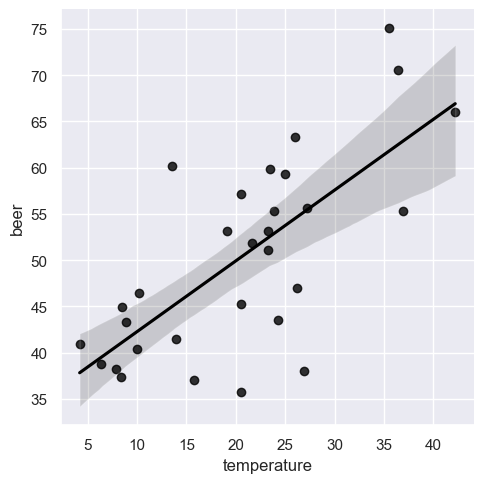

In [12]:
sns.lmplot(x = "temperature", y = "beer", data = beer,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})
plt.show()

### 5.1.10 모델을 이용한 예측

In [13]:
# 모델에 의한 예측값 (주어진 훈련 데이터에 대해)
lm_model.predict()

array([50.301, 53.746, 42.264, 55.2  , 46.704, 37.825, 44.943, 54.511,
       52.445, 41.116, 54.664, 49.23 , 53.21 , 52.445, 41.04 , 52.598,
       45.25 , 61.783, 55.43 , 50.301, 42.418, 50.301, 51.143, 40.657,
       66.911, 52.904, 62.854, 41.423, 62.472, 39.509])

In [14]:
# 예측 (기온 = 10도일 때)
lm_model.predict(pd.DataFrame({"temperature":[0]}))

0    34.610215
dtype: float64

In [15]:
# 모델 패러미터와 비교: 기온이 0도일 때 판매량 예측 = β0 (Intercept)
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [16]:
# 예측 (기온이 20도일 때)
lm_model.predict(pd.DataFrame({"temperature":[20]}))

0    49.918767
dtype: float64

In [17]:
# predict함수를 쓰지 않고 계산한 경우
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20

beta0 + beta1 * temperature

/var/folders/s0/flnd6hf15vs62n5vkdlhyg_m0000gn/T/ipykernel_32770/1311288595.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta0 = lm_model.params[0]
/var/folders/s0/flnd6hf15vs62n5vkdlhyg_m0000gn/T/ipykernel_32770/1311288595.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1 = lm_model.params[1]


49.919

### 5.1.11 잔차 계산
잔차 residuals = (실제 관측값) - (모델 예측값)

In [33]:
# 잔차(residual)
resid = lm_model.resid
resid.head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

In [19]:
# 모델 예측값 (fitted values): 수동 계산
y_hat = beta0 + beta1 * beer.temperature
y_hat.head(3)

0    50.301481
1    53.745905
2    42.264491
Name: temperature, dtype: float64

In [20]:
# 모델 예측값
lm_model.fittedvalues.head(3)

0    50.301481
1    53.745905
2    42.264491
dtype: float64

In [34]:
# 잔차: 수동 계산 
(beer.beer - y_hat).head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

### 5.1.12 결정계수
결정계수 R^2 = (모델이 설명하는 분산) / (실제 관측된 분산)

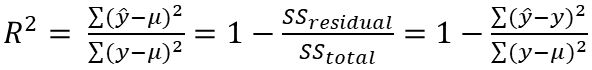

In [35]:
# 결정계수
mu = np.mean(beer.beer)
y = beer.beer
yhat = lm_model.predict()

np.sum((yhat - mu)**2) / np.sum((y - mu)**2)

0.504

In [23]:
lm_model.rsquared

0.504

In [24]:
np.sum((yhat - mu)**2) + sum(resid**2)

3277.115

In [25]:
np.sum((y - mu)**2)

3277.115

In [26]:
1 - np.sum(resid**2) / np.sum((y - mu)**2)

0.504

이 식은 **결정계수(R², R-squared)**를 계산하는 공식입니다.

- `resid` : 잔차(실제값 - 예측값)
- `y` : 실제 관측값
- `mu` : 실제값의 평균

공식은 다음과 같습니다.

```
1 - np.sum(resid**2) / np.sum((y - mu)**2)
```

- **np.sum(resid**2)** : 잔차 제곱합 (모델이 설명하지 못한 분산)
- **np.sum((y - mu)**2)** : 전체 제곱합 (전체 데이터의 분산)

따라서  
이 식은 **모델이 전체 변동성(분산) 중에서 얼마나 설명했는지**를 나타냅니다.

- 값이 1에 가까울수록 모델이 데이터를 잘 설명함  
- 값이 0에 가까울수록 모델이 데이터를 잘 설명하지 못함

이것이 바로 **결정계수(R²)**입니다.

### 5.1.13 수정된 결정계수
독립변수가 늘어나면 과다학습(overtraining)으로 결정계수가 큰 값이 되므로, 독립변수(모델 패러미터)의 갯수에 따른 페널티를 적용.
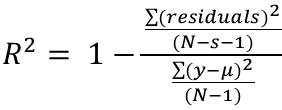
s: 독립변수의 갯수

수정된 결정계수(Adjusted R²)는 독립변수(설명변수)가 많아질수록 R²가 무조건 커지는 현상을 보정하기 위해 사용합니다.

일반 R²는 독립변수를 추가하면 설명력이 실제로 늘지 않아도 값이 커질 수 있습니다.
그래서 **모델의 복잡도(독립변수 개수)**에 따라 패널티를 주는 방식이 바로 수정된 결정계수입니다.

공식은 다음과 같습니다:

여기서

n : 데이터 개수
s : 독립변수 개수
잔차제곱합 : np.sum(resid**2)
전체제곱합 : np.sum((y - mu)**2)
n - s - 1 : 잔차의 자유도
n - 1 : 전체 자유도
즉,
독립변수가 많아질수록 자유도가 줄어들어, 설명력이 실제로 늘지 않으면 Adjusted R²가 오히려 작아질 수 있습니다.
그래서 여러 모델을 비교할 때는 일반 R²보다 **수정된 결정계수(Adjusted R²)**를 더 신뢰합니다.



In [36]:
n = len(beer.beer)
s = 1
1 - ((np.sum(resid**2) / (n - s - 1)) / 
    (np.sum((y - mu)**2) / (n - 1)))

0.486

In [28]:
lm_model.rsquared_adj

0.486

In [29]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Wed, 28 May 2025   Prob (F-statistic):           1.11e-05
Time:                        15:30:02   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5.1.14 잔차 그래프
모델에서 추정하지 못한 잔차(residual)은 정규분포임을 가정함.

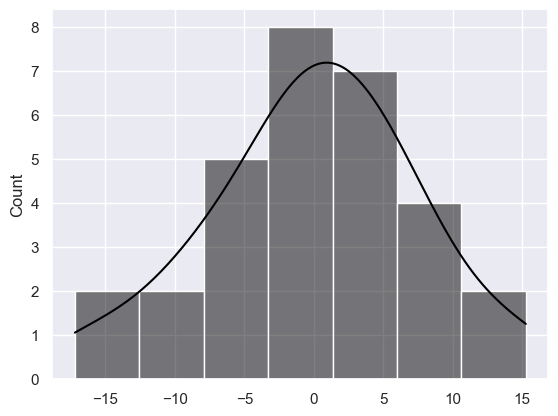

In [30]:
# 잔차의 히스토그램
sns.histplot(resid, color = 'black', kde = True)
plt.show()

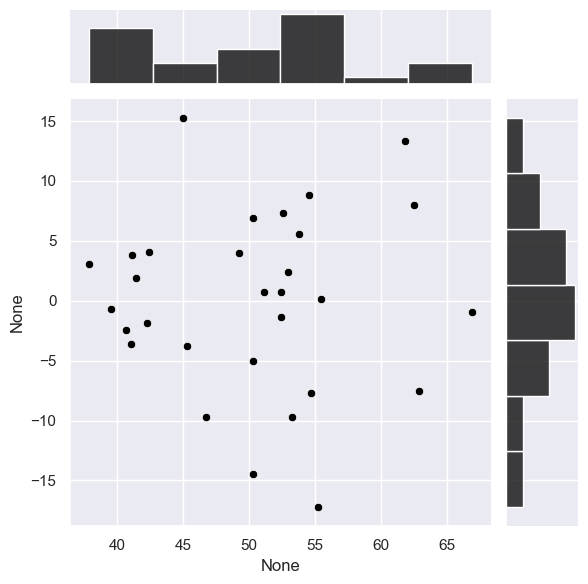

In [31]:
# 잔차의 산포도
# : 남아있는 잔차가 완전히 랜덤이며 상관이 없음을 확인.
sns.jointplot(x = lm_model.fittedvalues, y = resid, 
              joint_kws={"color": "black"}, 
              marginal_kws={"color": "black"})
plt.show()

### 5.1.15 Q-Q 플롯
이론상의 분위점(quantile)과 실제 데이터의 분위점을 산포도로 그린 것.

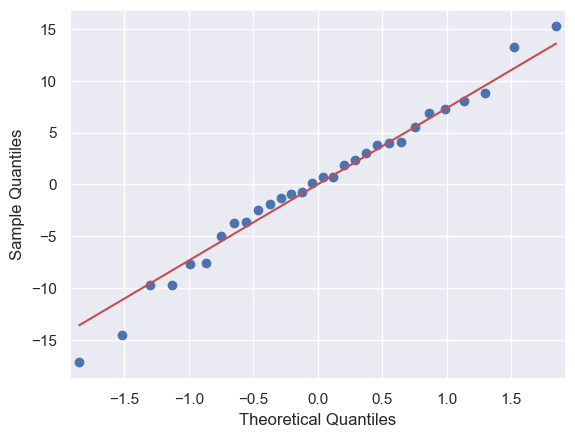

In [37]:
# Q-Q 플롯
# : 잔차가 정규분포와 근접한지 확인.
fig = sm.qqplot(resid, line = "s")
plt.show()

Q-Q 플롯(Quality-Quantile Plot, Q-Q plot)은 데이터가 특정 분포(여기서는 정규분포)를 따르는지 시각적으로 확인하는 그래프입니다.

Q-Q 플롯에서 보는 법
점들이 대각선(기준선) 근처에 잘 모여 있으면
→ 잔차가 정규분포를 따른다고 볼 수 있습니다.
점들이 곡선이나 S자, 한쪽으로 치우쳐 있으면
→ 잔차가 정규분포를 따르지 않는다는 신호입니다.
왜 중요한가?
회귀분석에서는 잔차가 정규분포를 따른다는 가정이 중요합니다.
Q-Q 플롯을 통해 이 가정이 잘 지켜지는지 시각적으로 쉽게 확인할 수 있습니다.

정리:
Q-Q 플롯은 잔차가 정규분포를 따르는지 확인하는 시각적 도구입니다.
점들이 기준선에 가까울수록 정규성 가정이 잘 만족된다는 뜻입니다.

### 5.1.16 summary 함수의 출력으로 보는 잔차 체크

In [50]:
# 모델 추정 결과
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Mon, 17 May 2021   Prob (F-statistic):           1.11e-05
Time:                        17:49:48   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

skew : 왜도 - 데이터가 x축을 기준으로 오른쪽 또는 왼쪽에 치우쳐있다.<br>
kurtosis : 첨도 - 데이터가 중앙에 밀집되어있거나 또는 골고루 퍼져있음을 보여준다.

잔차 관련 통계: 세번째 표 참고
* Prob(Omnibus), Prob(JB): 잔차의 정규성에 대한 검정 (이 p값이 0.05보다 작으면 잔차가 정규분포를 명확히 벗어남).

* 왜도(Skew): 히스토그램의 좌우비대칭의 방향과 그 정도. 0보다 크면 오른쪽 꼬리가 길다. 0보다 작으면 왼쪽 꼬리가 길다.
* 첨도(Kurtosis): 히스토그램 중심부의 뾰족함. 정규분포의 첨도는 3. 이보다 크면 정규분포보다 더욱 뾰족한 분포.